# Projeto Machine Learning - Censo

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano. Portanto fazer uma previsão por meio um modelo de Machine Learning.

**Habilidades Avaliadas**: 
* Técnicas de Transformação e Preparação de dados
* Aplicação, Avaliação e Tunning de Modelos de Machine Learning para Classificação.

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

## Importando as bibliotecas

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle

## Carregando e conhecendo a Base de Dados

In [2]:
#Importando a base de dados

df = pd.read_csv('adult.data', na_values= '?') #na_values substitue os valores ? na df por valores NaN, para o seu reconhecimento.

In [3]:
df.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [12]:
df.tail(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Descrição das Features

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [13]:
#variáveis numéricas

df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#variáveis categóricas

df.describe(include=['O'])

#Já nessa analise quando vemos a variável alvo income, é mostrado que renda abaixo de 50 possui 37155 amostras, algo que indica o desbalancenamento do dataset.

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


# Passos 

###  1 º Análise Exploratória do Dados

<IPython.core.display.Javascript object>


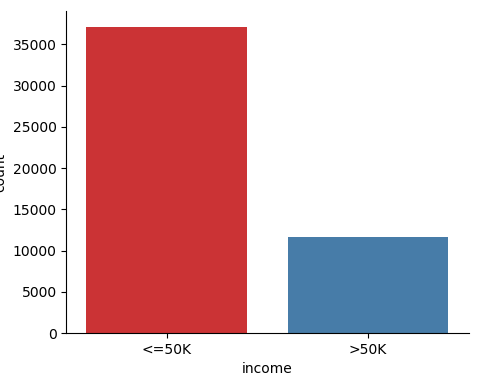

In [16]:
# Visualizando a distribuição das classes - variável income (Y)

%matplotlib notebook

sns.catplot(x= "income", kind="count", palette="Set1", data=df)



In [20]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

<IPython.core.display.Javascript object>


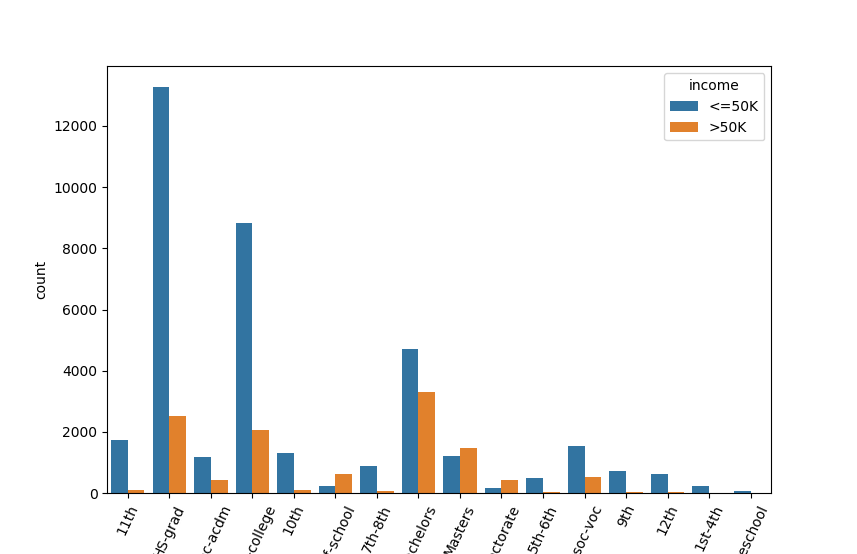

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

In [32]:
# Visualizando a distribuição das classes(y) por Nível de Escolaridade.

plt.figure(figsize=(5,5))
sns.countplot(x= "education", data=df, hue='income')
plt.xticks(rotation=65)

In [34]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<IPython.core.display.Javascript object>


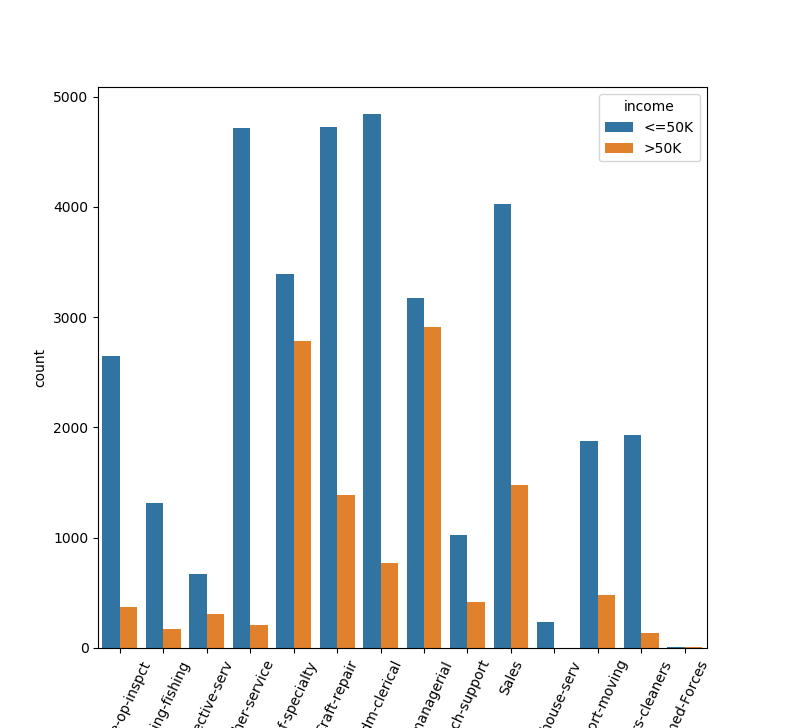

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

In [35]:
# Visualizando a distribuição das classes(y) de acordo com a ocupação.

plt.figure(figsize=(5,5))
sns.countplot(x= "occupation", data=df, hue='income')
plt.xticks(rotation=65)

In [37]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>


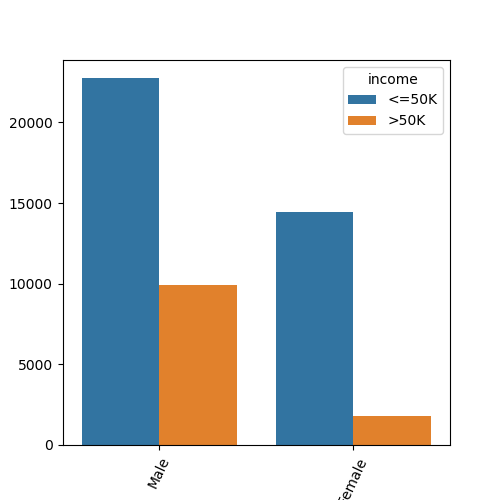

(array([0, 1]), <a list of 2 Text xticklabel objects>)

In [38]:
#Visualize a relação (scatter) da coluna sex com a coluna income.

plt.figure(figsize=(5,5))
sns.countplot(x= "sex", data=df, hue='income')
plt.xticks(rotation=65)

In [39]:
df["sex"].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

<IPython.core.display.Javascript object>


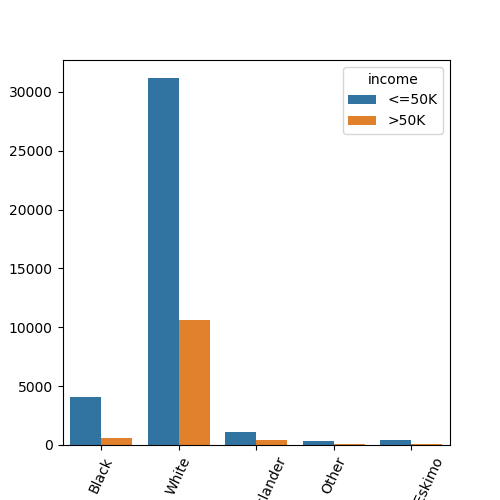

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

In [40]:
#Visualize a relação (scatter) da coluna race com a coluna income

plt.figure(figsize=(5,5))
sns.countplot(x= "race", data=df, hue='income')
plt.xticks(rotation=65)

In [41]:
df["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [48]:
#Verificando a distribuição das idades(min e max)

print(f'A idade minima é de: {df.age.min()} anos')
print(f'A idade maxima é de: {df.age.max()} anos')

A idade minima é de: 17 anos
A idade maxima é de: 90 anos


In [5]:
#tranformando a variável idade para retirar o sua condição lógica
#irei usar o divisão de:
#0 a 25 = young
#25 50 = adult
#50 a 100 = old

df['age'] = pd.cut(df['age'], [0,25,50,100], labels=['young', 'adult', 'old'])



In [6]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,young,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,adult,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,adult,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,adult,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,young,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


<IPython.core.display.Javascript object>


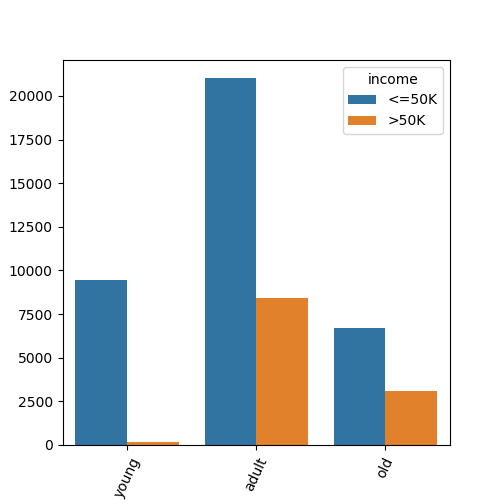

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [51]:
#Visualize a relação (scatter) da coluna age com a coluna income

plt.figure(figsize=(5,5))
sns.countplot(x= "age", data=df, hue='income')
plt.xticks(rotation=65)

In [52]:
df["age"].value_counts()

adult    29407
old       9808
young     9627
Name: age, dtype: int64

In [55]:
df["hours-per-week"].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

In [7]:
#transformando a variável hour-per-week devido as sua caracteristica lógica. Possui uma amplitude de 1 a 99.
#a divisão sera:
# 0-30 (jornada curta)
# 30-40 (jornada normal)
# 40-100 (jornada extra)

df["hours-per-week"] = pd.cut(df["hours-per-week"], [0,30,40,100], labels=['short', 'normal', 'extra'])


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

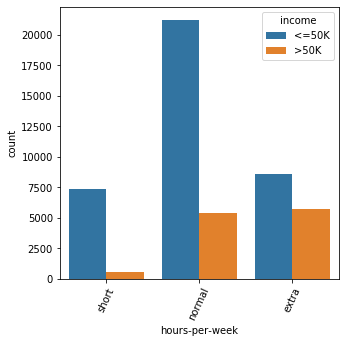

In [8]:
##Visualize a relação (scatter) da coluna hours-per-week com a coluna income

plt.figure(figsize=(5,5))
sns.countplot(x= "hours-per-week", data=df, hue='income')
plt.xticks(rotation=65)

### 2 º Verificação e Pré - Processamento dos Dados

**Verificando a existencia de Missing Values**

- Os missing values podem ser oriundos de falhas em carga de dados, crawler ou ate a corrupção dos mesmos quando foram coletados e devem ser tratados. 
- Podem ser um problema quando utilizamos algoritmos de Machine Learning, que não trabalham bem com dados faltantes.

In [9]:
#consultando as linhas com valores faltantes.
total = df.isnull().sum().sort_values(ascending=False)
total

occupation         2809
workclass          2799
native-country      857
income                0
hours-per-week        0
capital-loss          0
capital-gain          0
sex                   0
race                  0
relationship          0
marital-status        0
educational-num       0
education             0
age                   0
dtype: int64

In [10]:
#analisando o porcentagem de null no total da variável

percent = df.isnull().sum()/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
occupation,2809,0.057512
workclass,2799,0.057307
native-country,857,0.017546


- Por meio da analise anterior é visto os valores missing são apenas uma pequna porcentagem dos dados na variáveis. Sendo assim é possivel adicionar os valores mais presentes em cada variável no lugar dos nulos, como será feito a seguir.

In [11]:
## substituindo os valores nulos na coluna occupation por "Prof-specialty".

change = "Prof-specialty"
df["occupation"] = df["occupation"].fillna(change)

In [68]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
## substituindo os valores nulos na coluna workclass por "Private".

change = "Private"
df["workclass"] = df["workclass"].fillna(change)

In [70]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [13]:
## substituindo os valores nulos na coluna workclass por "Private".

change = "United-States"
df["native-country"] = df["native-country"].fillna(change)

In [14]:
#verificando se ainda ocorrem valores nulos.

if df.isnull().sum().sort_values(ascending=False).any():
    print(f'Valores nulos? {True}')
else:
    print(f'Valores nulos? {False}')

Valores nulos? False


**Retirando variáveis irrelevantes**

In [75]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,young,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,normal,United-States,<=50K
1,adult,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,extra,United-States,<=50K
2,adult,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,normal,United-States,>50K
3,adult,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,normal,United-States,>50K
4,young,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,short,United-States,<=50K


In [15]:
#As variáveis capital gain e capital loss podem ser tornal apenas uma, subtraindo uma na outra e idnicando uma variavel com a renda final.

df["capital_total"] = df["capital-gain"] - df["capital-loss"]

In [16]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_total
0,young,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,normal,United-States,<=50K,0
1,adult,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,extra,United-States,<=50K,0
2,adult,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,normal,United-States,>50K,0
3,adult,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,normal,United-States,>50K,7688
4,young,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,short,United-States,<=50K,0


In [17]:
#Pode-se ver que a variável education se torna irrelevante pois temos outroa variável correlacionada a mesma.
#a educational-num que possui um valor relacionado ao grau de educação, podemos entao excluir esta variável.
#Também podemos excluir as duas colunas relacionadas com o capital devido ao processo anterior.

def remove_features(lista_features):
    for i in lista_features:
        df.drop(i, axis=1, inplace=True)

        
remove_features(['education', 'capital-gain', 'capital-loss'])



In [18]:
df.head()

#As variáveis que ainda estão no dataset, sao consideradas relavantes devido a caracteristicas de negócio

,age,workclass,educational-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital_total
0,young,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,normal,United-States,<=50K,0
1,adult,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,extra,United-States,<=50K,0
2,adult,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,normal,United-States,>50K,0
3,adult,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,normal,United-States,>50K,7688
4,young,Private,10,Never-married,Prof-specialty,Own-child,White,Female,short,United-States,<=50K,0


**Convertendo as colunas categóricas em numéricas.**

In [81]:
#analisando as colunas em formato "object".

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  category
 1   workclass        48842 non-null  object  
 2   educational-num  48842 non-null  int64   
 3   marital-status   48842 non-null  object  
 4   occupation       48842 non-null  object  
 5   relationship     48842 non-null  object  
 6   race             48842 non-null  object  
 7   sex              48842 non-null  object  
 8   hours-per-week   48842 non-null  category
 9   native-country   48842 non-null  object  
 10  income           48842 non-null  object  
 11  capital_total    48842 non-null  int64   
dtypes: category(2), int64(2), object(8)
memory usage: 3.8+ MB


In [19]:
#usando a técnica LabelEncoder para a tranformação das variáveis.

cols = df[df.select_dtypes(['object']).columns]

for i in cols:
    enc = LabelEncoder()
    enc.fit(list(df[i].values))
    df[i] = enc.transform(list(df[i].values) )   

In [20]:
#Para resolver o problema da ordenação (os valores menores possuiram uma importância menor do que os maiores), portano lógica.
#Utilizaremos o get_dummies, que tranfomra em uma matriz presença os valores categoricos.

df = pd.get_dummies(df)

In [21]:
df.head()

,workclass,educational-num,marital-status,occupation,relationship,race,sex,native-country,income,capital_total,age_young,age_adult,age_old,hours-per-week_short,hours-per-week_normal,hours-per-week_extra
0,3,7,4,6,3,2,1,38,0,0,1,0,0,0,1,0
1,3,9,2,4,0,4,1,38,0,0,0,1,0,0,0,1
2,1,12,2,10,0,4,1,38,1,0,0,1,0,0,1,0
3,3,10,2,6,0,2,1,38,1,7688,0,1,0,0,1,0
4,3,10,4,9,3,4,0,38,0,0,1,0,0,1,0,0


**Matriz de Correlação**

- A matriz irá indicar a associação entre as variáveis, para iniciar-mos a analise das features mais importantes para o modelo.

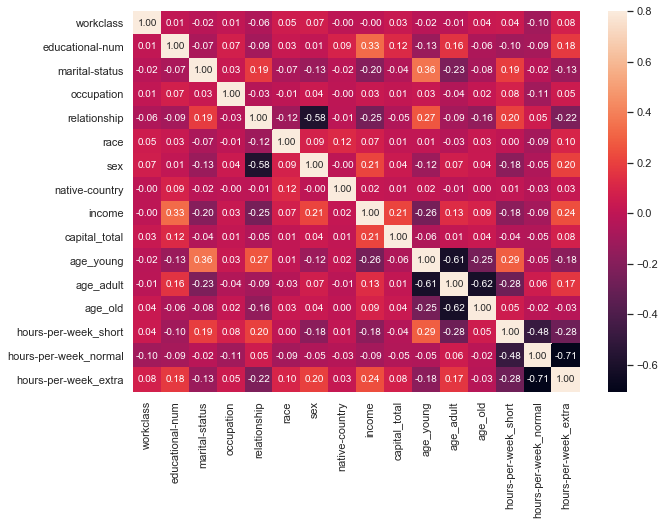

In [23]:
corr = df.corr()
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(10, 7))
sns.heatmap(corr, vmax=.8, annot_kws={'size': 10}, annot=True, fmt='.2f')

In [24]:
#Listando as maiores correlações em relaçãop a variavel alvo(income).

corr_list = corr['income'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

educational-num          0.332613
hours-per-week_extra     0.243127
sex                      0.214628
capital_total            0.214356
age_adult                0.133381
age_old                  0.092733
race                     0.070934
occupation               0.032550
native-country           0.020375
workclass               -0.000511
hours-per-week_normal   -0.092061
hours-per-week_short    -0.176724
marital-status          -0.199072
relationship            -0.253214
age_young               -0.257496
Name: income, dtype: float64

- Vemos que as variáveis que mais influenciam, são as duas primeiras que possuem uma relação direta econômica (educational-num, hours-per-week_extra) e a terceira demográfica (sex).

## 3 º Engenharia de Features e Padronização os Dados

- Inicalmente vou verificar as features mais importantes, e depois fazer a padronização dos dados. Evitando assim um custo computacional que pode ser evitado com a utilização de variáveis que são poucos relevantes para o modelo.

- Utilizarei o RandomForest para essa analise, devido a gostar deste algoritmo como mais generalista.

In [71]:
#Seperando os dados em x(previsores) e y(alvo)

x = df.drop('income', axis=1)
y = df['income']

In [72]:
x.shape

(48842, 15)

In [73]:
y.shape

(48842,)

In [74]:
#treinando o modelo

clf = RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [76]:
x

,workclass,educational-num,marital-status,occupation,relationship,race,sex,native-country,capital_total,age_young,age_adult,age_old,hours-per-week_short,hours-per-week_normal,hours-per-week_extra
0,3,7,4,6,3,2,1,38,0,1,0,0,0,1,0
1,3,9,2,4,0,4,1,38,0,0,1,0,0,0,1
2,1,12,2,10,0,4,1,38,0,0,1,0,0,1,0
3,3,10,2,6,0,2,1,38,7688,0,1,0,0,1,0
4,3,10,4,9,3,4,0,38,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3,12,2,12,5,4,0,38,0,0,1,0,0,1,0
48838,3,9,2,6,0,4,1,38,0,0,1,0,0,1,0
48839,3,9,6,0,4,4,0,38,0,0,0,1,0,1,0
48840,3,9,4,0,3,4,1,38,0,1,0,0,1,0,0


In [77]:
#instanciando as variáveis mais importantes.

feature_imp = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_imp

capital_total            0.230174
educational-num          0.187011
relationship             0.145336
marital-status           0.115883
occupation               0.103485
workclass                0.059647
native-country           0.030851
hours-per-week_extra     0.025062
race                     0.023752
age_young                0.023580
sex                      0.017019
hours-per-week_short     0.014473
hours-per-week_normal    0.008629
age_adult                0.007784
age_old                  0.007313
dtype: float64

In [108]:
feature_imp.iteritems()#contém index, valor

In [28]:
#Selecionando apenas as features de maior importância. O corte como foi visto na literatura será de 0.03.

feature_selected = []
for feature, importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance*100)}%')
        feature_selected.append(feature)

capital_total: 23%
educational-num: 19%
relationship: 15%
marital-status: 12%
occupation: 10%
workclass: 6%
native-country: 3%


In [29]:
#Salvando apenas as features selecionas.

x = df[feature_selected]
y = df['income']

**Padronizando os dados**

- Será utilizada a biblioteca StandarScaler. Como os dados em alggumas variáveis estão em diferentes escalas, isso pode prejuticar a performance de alguns algoritmos. Assim será aplicada a padrnização dos dados para que os dados fiquem em um adistribuição normal, com a média = 0 e desvio padrão = 1.

- Já utilizarei as Pipelines dos algoritmos de classificação para que posteriormente facilite a escolha dos modelos que serão utilizados. Portanto farei a standartização e o treino juntos.

- O SVM, não é recomendado o seu uso devido ao grande volume de dados, o mesmo necessita de um tempo maior para o treinamento. Irei utilizar apenas devido ao carater acadêmico deste projeto, não sendo recom,endavel em utilizações reais.

In [31]:
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))),
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))),
pipelines.append(('Scaled-DTC', Pipeline([('Scaler', StandardScaler()),('DTC', DecisionTreeClassifier())]))),
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))),
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', svm.SVC())]))),
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())]))),


for nome, modelo in pipelines:
    print(pipelines)

[('Scaled-LR', Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)), ('Scaled-KNN', Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
             

## 4º Classificação e Avaliação de Modelos de ML

- Inicarei com a avaliação dos modelos a partir das pipelines com o treino dos modelos feitas anteriormente.

- Utilizarei a média e o desvio padrão da cross validation score para a análise.

In [32]:
#Percorrendo os modelos treinados.

resultados = []
nomes = []

for nome, modelo in pipelines:
    kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state = 7)
    cross_validation_result = model_selection.cross_val_score(modelo, x, y, cv=kfold, scoring='accuracy')
    resultados.append(cross_validation_result)
    nomes.append(nome)
    texto = "%s: %f (%f)" % (nome, cross_validation_result.mean(), cross_validation_result.std())
    print(texto)

Scaled-LR: 0.819009 (0.005286)
Scaled-KNN: 0.833299 (0.008261)
Scaled-DTC: 0.855514 (0.003724)
Scaled-NB: 0.803305 (0.004793)
Scaled-SVM: 0.843106 (0.002925)
Scaled-RF: 0.857459 (0.003384)


- Por meio do scoring de acuracia chegamos ao resultados que os algoritmos com melhores resultados foram o RandomForest e o DecisionTree. O algoritmo SVM, também apresentou um resultado favorel, porem devido ao tempo de processamento para esta base de dados, irei utilizar apenas os dois primeiros.

- Com essa conclusão iremos utilizar os dois para os próximos passos, que será a Tunning do modelo.

## Tunning (Random Forest e DecisionTree)

- Farei o ajuste dos parametros para melhorar a performance dos modelos por meio do RandomizedSearchCV. Por emio do Tunning pode-se chegar a uma otimização dos Hiperparâmetros.

- Em contraste com GridSearchCV,  no RandomizedSearchCV nem todos os valores de parâmetro são testados, mas um número fixo de configurações de parâmetro é amostrado a partir das distribuições especificadas. O número de configurações de parâmetro que são tentadas é fornecido por n_iter o qual possui em default 10 tentativas.

**Tunning - Random Forest**

In [34]:
#Ajustando os parametros por meio do Tunning.

#definindo a padronização

scaler = StandardScaler()
x = scaler.fit_transform(x)

#valores que serão testados dos estimadores

val_estimators = [20, 50, 100, 150, 200, 250]

#valores testados como critério de divisão

val_criterion = ['gini', 'entropy']

#dicionario que recebe a lista de parâmetros.

parameters_grid = dict(n_estimators = val_estimators,
                      criterion = val_criterion)

#Modelo

model_rf = RandomForestClassifier()

#definindo K

kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)

#Testando as combinações com os parâmetros.

grid = RandomizedSearchCV(estimator = model_rf, param_distributions = parameters_grid, cv = kfold, scoring = 'accuracy')
grid.fit(x, y)

#Visualizando

print("Grid scores:")
means = grid.cv_results_["mean_test_score"].round(4)
stds = grid.cv_results_["std_test_score"].round(4)
param = grid.cv_results_['params']

for mean, std, params in zip(means, stds, param):
    print(f'mean:{mean}, std:{std}, params:{params}')

print(f'Best params RF:{grid.best_params_}, Score:{grid.best_score_}')


Grid scores:
mean:0.8582, std:0.0033, params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.8577, std:0.0033, params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.8581, std:0.0039, params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.858, std:0.0033, params:{'n_estimators': 250, 'criterion': 'entropy'}
mean:0.8579, std:0.003, params:{'n_estimators': 200, 'criterion': 'entropy'}
mean:0.857, std:0.0038, params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.8583, std:0.0033, params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.8575, std:0.0033, params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.858, std:0.003, params:{'n_estimators': 250, 'criterion': 'gini'}
mean:0.8571, std:0.0031, params:{'n_estimators': 50, 'criterion': 'gini'}

Best params:{'n_estimators': 200, 'criterion': 'gini'}, Score:0.8583391342398506


**Tunning - Decision Tree**

In [36]:
#Ajustando os parametros por meio de Tunning.

#definindo a padronização

scaler = StandardScaler()
x = scaler.fit_transform(x)

#profundidade máxima da árvore.

max_depth = list(range(1, 35))

##valores testados como critério de divisão

val_criterion = ['gini', 'entropy']

#dicionario que recebe a lista de parâmetros.

parameters_grid = dict(max_depth = max_depth,
                      criterion = val_criterion)

#modelo

model_tree = DecisionTreeClassifier()

#definindo K

kfold = StratifiedKFold(n_splits=10, shuffle = True, random_state=7)

#testando as combinações com os parâmetros.

grid = RandomizedSearchCV(estimator = model_tree, param_distributions = parameters_grid, cv = kfold, scoring = 'accuracy')
grid.fit(x, y)

#print

print("Grid scores:")
means = grid.cv_results_["mean_test_score"].round(4)
stds = grid.cv_results_["std_test_score"].round(4)
param = grid.cv_results_['params']

for mean, std, params in zip(means, stds, param):
    print(f'mean:{mean}, std:{std}, params:{params}')

print(f'Best params tree:{grid.best_params_}, Score:{grid.best_score_}')

Grid scores:
mean:0.8559, std:0.0034, params:{'max_depth': 22, 'criterion': 'gini'}
mean:0.8538, std:0.0026, params:{'max_depth': 7, 'criterion': 'gini'}
mean:0.8558, std:0.0033, params:{'max_depth': 27, 'criterion': 'entropy'}
mean:0.8589, std:0.0027, params:{'max_depth': 12, 'criterion': 'entropy'}
mean:0.8572, std:0.0031, params:{'max_depth': 19, 'criterion': 'gini'}
mean:0.8395, std:0.0042, params:{'max_depth': 3, 'criterion': 'gini'}
mean:0.8561, std:0.0035, params:{'max_depth': 29, 'criterion': 'gini'}
mean:0.8558, std:0.0037, params:{'max_depth': 21, 'criterion': 'entropy'}
mean:0.8559, std:0.0034, params:{'max_depth': 33, 'criterion': 'gini'}
mean:0.8551, std:0.0033, params:{'max_depth': 26, 'criterion': 'entropy'}
Best params tree:{'max_depth': 12, 'criterion': 'entropy'}, Score:0.8589329810875359


**Melhores Resultados - Tunning**

- Random Forest: n_estimators: 200, criterion: gini, Score:0.8583

- DecisionTree: max_depth: 12, criterion: entropy, Score:0.8589

- O melhor modelo foi o DecisionTree, apresentando a melhor acurácia, sendo assim será utilizada na versão final do modelo preditivo que será feita a seguir.

In [39]:
#Versão final

scaler = StandardScaler()
x = scaler.fit_transform(x)
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, random_state = 7)
model_tree.fit(x, y)
result = cross_val_predict(model_tree, x, y, cv = 10)

#print

print(f'Accuracy: {accuracy_score(y, result)}')
print('\n', confusion_matrix(y, result))
print('\n', classification_report(y, result))

Accuracy: 0.8589328856312191

 [[35140  2015]
 [ 4875  6812]]

               precision    recall  f1-score   support

           0       0.88      0.95      0.91     37155
           1       0.77      0.58      0.66     11687

    accuracy                           0.86     48842
   macro avg       0.82      0.76      0.79     48842
weighted avg       0.85      0.86      0.85     48842



**Considerações Finais**

- O modelo treinado pela DecisionTree apresentou um resultado positivo, onde chegou a uma acurácia de 0.86.
- A classificação de renda abaixo de 50 mil (0) apresentou um f1-score de 0.91, enquanto a classificação acima de 50 mil (1) obteve um valor de 0.66. Ambos valores considerados bons, mas com alguns poréns em relação a calssificação do acima de 50 mil.
- Esta diferença é relativa aos dados de treino se apresentarem desbalanceados em relação a cada classe, em que a maior parte dos dados possuiu rotulo 0, influenciando em um modelo melhor treinado para estes dados.
- É possivel rearranjar os dados com a utilização de algumas bilbliotecas como: Undersampling, NearMiss, SMOTE, etc.
- O objetivo de projeto é repassar conhecimento para o desenvolvimento de uma análise utilizando Machine Learning, o que está apresentado.

## 5º Persistindo o modelo treinado em disco

In [80]:
#filename = 'model_censo.sav'
pickle.dump(model_tree, open('model_censo.sav', 'wb'))
pickle.load(open('model_censo.sav', 'rb'))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')